# Learning Objectives

###### Demonstrate how to connect to a database from a Jupyter notebook
###### Demonstrate how to create tables and insert data from Python
###### Demonstrate how to perform simplified database access from Python using SQL magic
###### Demonstrate writing SQL queries and retrieve result sets from Python
###### Describe concepts related to accessing Databases using Python

## MECHANISM

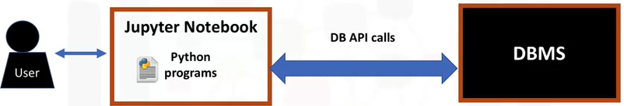![](DBMS.JPG)

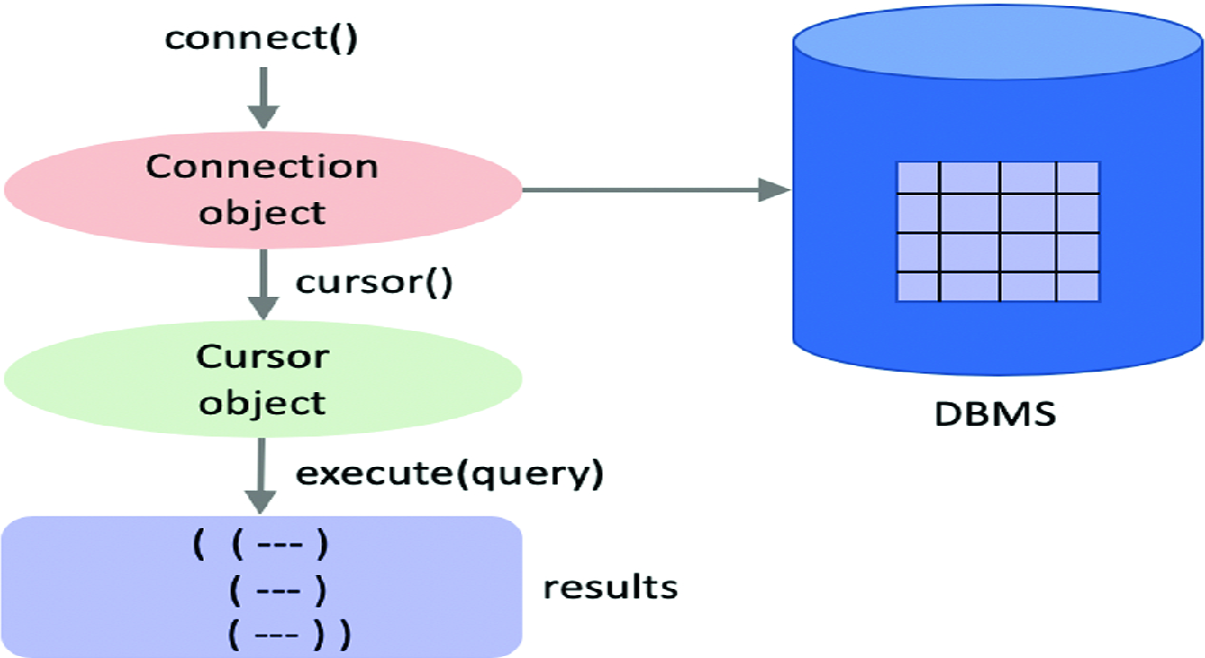![](cursor.png)

In [1]:
# Create a SQL connection to our SQLite database
import pandas as pd
import sqlite3
con = sqlite3.connect("kadb.db")
cur = con.cursor()
cur.execute('''
          INSERT INTO sqlite_sequence (name, seq)
          VALUES
                ("playlist1",20)
          ''')
for row in cur.execute('SELECT * FROM sqlite_sequence;'):
    print(row)
# The result of a "cursor.execute" can be iterated over by row
cur.execute('SELECT * FROM sqlite_sequence;')
df = pd.DataFrame(cur.fetchall())
print(df)
# Be sure to close the connection
#con.close()

('genres', 25)
('media_types', 5)
('artists', 275)
('albums', 347)
('tracks', 3503)
('employees', 8)
('customers', 59)
('invoices', 412)
('invoice_items', 2240)
('playlists', 18)
('playlist1', 20)
                0     1
0          genres    25
1     media_types     5
2         artists   275
3          albums   347
4          tracks  3503
5       employees     8
6       customers    59
7        invoices   412
8   invoice_items  2240
9       playlists    18
10      playlist1    20


In [2]:
con.close()

In [3]:
conn = sqlite3.connect('test_database2')
c = conn.cursor()
c.execute('''
          CREATE TABLE IF NOT EXISTS items
          ([item_id] INTEGER PRIMARY KEY, [item_name] TEXT)
          ''')

df = pd.DataFrame(c.fetchall(), columns = ['item_name','price'])
print (df)

Empty DataFrame
Columns: [item_name, price]
Index: []


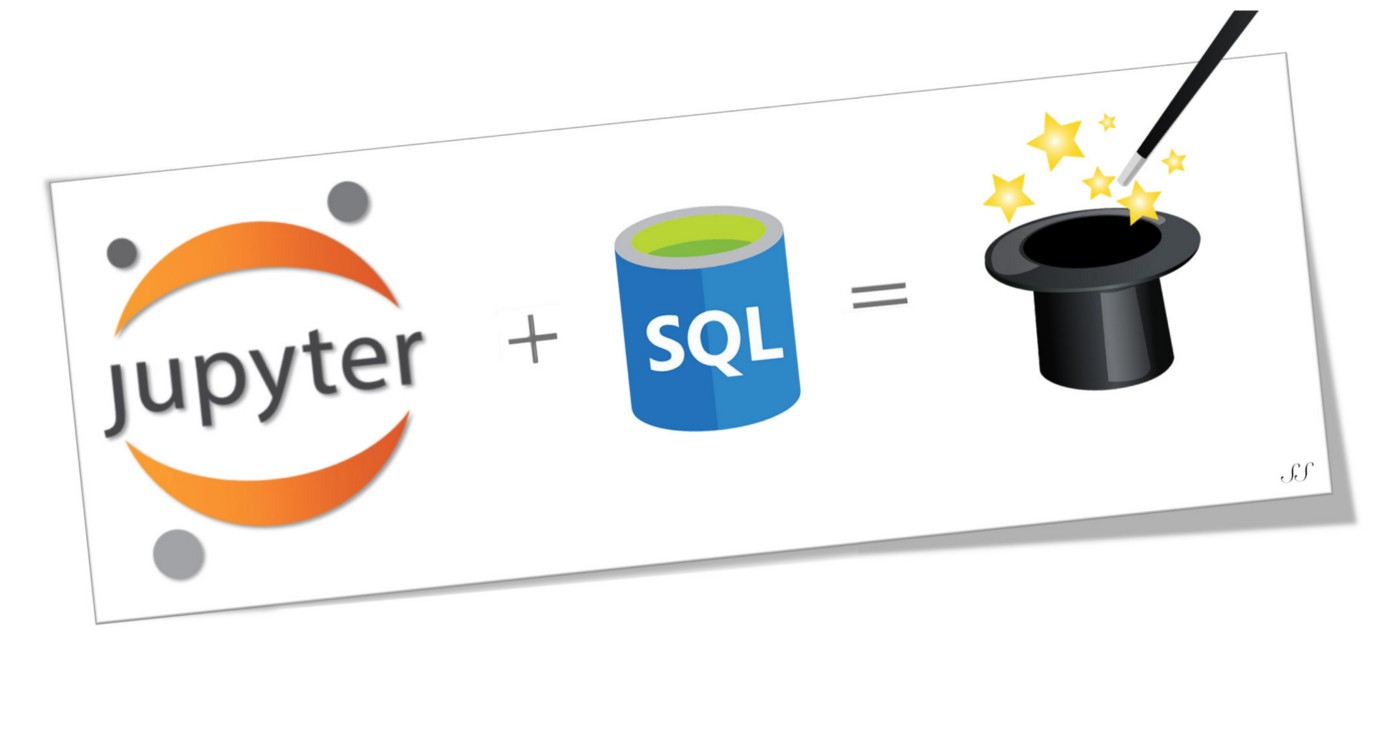![](magic.jpeg)

# SQL MAGIC

###### Magic functions are pre-defined functions(“magics”) in Jupyter kernel that executes supplied commands.
###### There are two kinds of magics line-oriented and cell-oriented prefaced with % and %% respectively.

###### The ipython-sql library is loaded using the %load_ext iPython extension syntax

In [1]:
%load_ext sql
%sql sqlite:///kadb.db

In [2]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///kadb.db
Done.


name
albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists


In [3]:
%sql SELECT * FROM movies

 * sqlite:///kadb.db
Done.


id,mov_name,mov_year,mov_time,mov_lang,mov_dt_rel,mov_rel_country,mov_id,rev_name,rev_id,rev_stars,num_o_ratings
901,Vertigo,1958,128,English,1958-08-24,UK,901,Righty Sock,9001,8.4,263575
902,The Innocents,1961,100,English,1962-02-19,SW,902,Jack Malvern,9002,7.9,20207
903,Lawrence of Arabia,1962,216,English,1962-12-11,UK,903,Flagrant Baronessa,9003,8.3,202778
904,The Deer Hunter,1978,183,English,1979-03-08,UK,904,Alec Shaw,9005,8.2,484746
905,Amadeus,1984,160,English,1985-01-07,UK,905,Francois Truffaut,9006,7.3,None
906,Blade Runner,1982,117,English,1982-09-09,UK,906,Victor Woeltjen,9007,8.6,779489
907,Eyes Wide Shut,1999,159,English,None,UK,907,Simon Wright,9008,None,227235
908,The Usual Suspects,1995,106,English,1995-08-25,UK,908,Neal Wruck,9009,3,195961
909,Chinatown,1974,130,English,1974-08-09,UK,909,Paul Monks,9010,8.1,203875
910,Boogie Nights,1997,155,English,1998-02-16,UK,910,Mike Salvati,9011,8.4,None


In [4]:
%%sql

CREATE TABLE Fam1(Name TEXT, Age INTEGER, Profession TEXT, Major TEXT);
INSERT INTO Fam1 (Name, Age) VALUES('Pam', 50);
INSERT INTO Fam1 (Name, Age) VALUES('Miranda', 32);
INSERT INTO Fam1 (Name, Age) VALUES('Pascal', 45);
INSERT INTO Fam1 (Name, Age) VALUES('Dave', 12);
INSERT INTO Fam1 (Name, Age) VALUES('Emmy', 23);

UPDATE Fam1 SET Profession='Unknown' WHERE Profession ISNULL

 * sqlite:///kadb.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
5 rows affected.


[]

In [5]:
%%sql
SELECT
    name
FROM
    sqlite_master
WHERE
    type='table'

 * sqlite:///kadb.db
Done.


name
albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists


In [6]:
%sql SELECT * FROM sqlite_sequence

 * sqlite:///kadb.db
Done.


name,seq
genres,25
media_types,5
artists,275
albums,347
tracks,3503
employees,8
customers,59
invoices,412
invoice_items,2240
playlists,18


In [7]:
%%sql

UPDATE sqlite_sequence SET seq=125 WHERE name='playlists'

 * sqlite:///kadb.db
1 rows affected.


[]

In [8]:
%%sql
SELECT * FROM sqlite_sequence

 * sqlite:///kadb.db
Done.


name,seq
genres,25
media_types,5
artists,275
albums,347
tracks,3503
employees,8
customers,59
invoices,412
invoice_items,2240
playlists,125


In [13]:
import pandas as pd
result = %sql select * from movies
dataframe = result.DataFrame()
dataframe

 * sqlite:///kadb.db
Done.


,id,mov_name,mov_year,mov_time,mov_lang,mov_dt_rel,mov_rel_country,mov_id,rev_name,rev_id,rev_stars,num_o_ratings
0,901,Vertigo,1958,128,English,1958-08-24,UK,901,Righty Sock,9001,8.4,263575
1,902,The Innocents,1961,100,English,1962-02-19,SW,902,Jack Malvern,9002,7.9,20207
2,903,Lawrence of Arabia,1962,216,English,1962-12-11,UK,903,Flagrant Baronessa,9003,8.3,202778
3,904,The Deer Hunter,1978,183,English,1979-03-08,UK,904,Alec Shaw,9005,8.2,484746
4,905,Amadeus,1984,160,English,1985-01-07,UK,905,Francois Truffaut,9006,7.3,None
5,906,Blade Runner,1982,117,English,1982-09-09,UK,906,Victor Woeltjen,9007,8.6,779489
6,907,Eyes Wide Shut,1999,159,English,None,UK,907,Simon Wright,9008,None,227235
7,908,The Usual Suspects,1995,106,English,1995-08-25,UK,908,Neal Wruck,9009,3,195961
8,909,Chinatown,1974,130,English,1974-08-09,UK,909,Paul Monks,9010,8.1,203875
9,910,Boogie Nights,1997,155,English,1998-02-16,UK,910,Mike Salvati,9011,8.4,None
